 # <center>  LAB6 - Kwadratury </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 

## Zadanie 1
Wiadomo, że:
$$ \int_0^1 \frac{4}{1 + x^2} \, dx = \pi $$
Powyższą równość można wykorzystać do obliczenia przybliżonej wartości π poprzez całkowanie numeryczne.

(a) Obliczenia
Oblicz wartość powyższej całki, korzystając ze złożonych kwadratur otwartej prostokątów (ang. mid-point rule), trapezów i Simpsona. Można wykorzystać funkcje integrate.trapz i integrate.simps z biblioteki scipy. Na przedziale całkowania rozmieść 2m+1 równoodległych węzłów. W kolejnych próbach m wzrasta o 1, tzn. między każde dwa sąsiednie węzły dodawany jest nowy węzeł, a ich zagęszczenie zwiększa się dwukrotnie. Przyjmij zakres wartości m od 1 do 25.

Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, n + 1 (gdzie n = 1/h, z krokiem h). Wyniki przedstaw na wspólnym wykresie, używając skali logarytmicznej na obu osiach.

(b) Analiza Kroku h
Czy istnieje pewna wartość, poniżej której zmniejszanie kroku h nie zmniejsza już błędu kwadratury? Porównaj wartość hmin, odpowiadającą minimum wartości bezwzględnej błędu względnego, z wartością wyznaczoną w laboratorium 1.

(c) Rząd Zbieżności
Dla każdej z użytych metod porównaj empiryczny rząd zbieżności z rząd zbieżności przewidywanym przez teorię. Aby wyniki miały sens, do obliczenia rzędu empirycznego użyj wartości h z zakresu, w którym błąd metody przeważa nad błędem numerycznym.



In [16]:
import numpy as np
from scipy.integrate import trapezoid, simpson
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.special import roots_legendre
from scipy.stats import linregress


In [17]:
def f(x):
    return 4 / (1 + x**2)

def mid_point_rule(y, x):
    midpoints = (x[:-1] + x[1:]) / 2
    widths = x[1:] - x[:-1]
    return np.sum(f(midpoints) * widths)  
    
def calculate_integral_error(method, m):
    errors = []
    for i in range(1, m+1):
        n = 2**i + 1
        x = np.linspace(0, 1, n)
        y = f(x)
        integral = method(y, x=x)
        error = np.abs(np.pi - integral) / np.pi
        errors.append(error)
    return errors

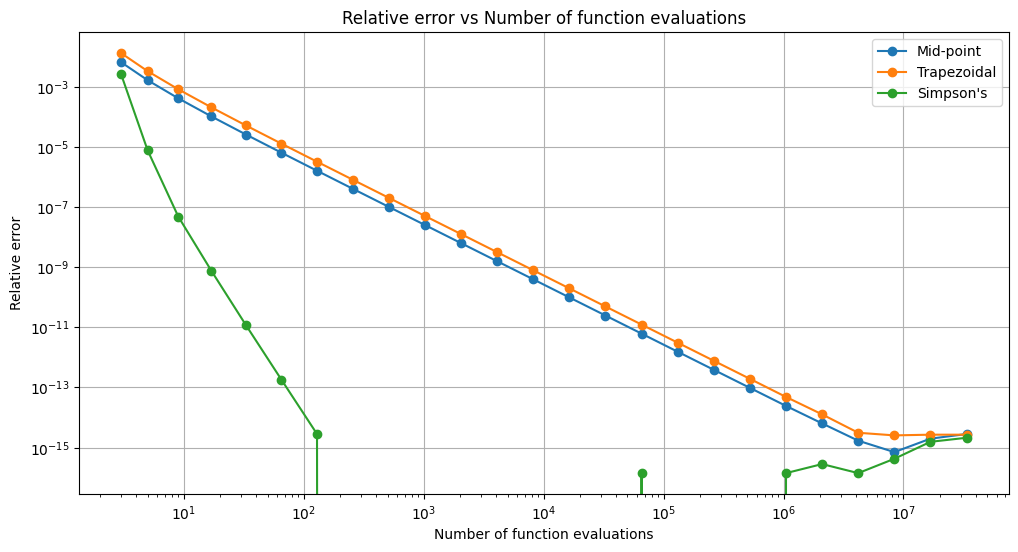

In [18]:
m_values = 2**np.arange(1, 26) + 1
errors_midpoint = calculate_integral_error(mid_point_rule, 25)
errors_trapezoidal = calculate_integral_error(trapezoid, 25)
errors_simpson = calculate_integral_error(simpson, 25)

plt.figure(figsize=(12, 6))
plt.plot(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.plot(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.plot(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
def relative_error(exact_value, estimated_value):
    return np.abs(exact_value - estimated_value) / exact_value

def calculate_hmin(method):
    h = 1.0
    previous_error = 1.0

    while True:
        n = int(1 / h) + 1
        x = np.linspace(0, 1, n)
        y = f(x)

        exact_value = np.pi
        integral_value = method(y, x=x)
        error = relative_error(exact_value, integral_value)

        if error >= previous_error or np.isnan(error):
            break

        previous_error = error
        h /= 2

    return h

h_min_trapezoidal = calculate_hmin(trapezoid)
print("H_min for Trapezoidal method is:", h_min_trapezoidal)

h_min_Simpson = calculate_hmin(simpson)
print("H_min for Simpson's method is:", h_min_Simpson)

H_min for Trapezoidal method is: 5.960464477539063e-08
H_min for Simpson's method is: 0.001953125


In [21]:

def calculate_error(method, h):
    x = np.linspace(0, 1, int(1/h) + 1)
    y = f(x)
    exact_value = np.pi
    integral_value = method(y, x=x)
    return np.abs(exact_value - integral_value)


In [22]:
def calculate_convergence_order(errors, hs):
    p_values = []

    for i in range(len(errors) - 1):
        if errors[i] == 0 or errors[i+1] == 0:
            continue
        p = np.log(errors[i+1] / errors[i]) / np.log(hs[i+1] / hs[i])
        p_values.append(p)

    return p_values

hs = np.logspace(-5, -1, 100)
errors_trapezoidal_empi = [calculate_error(trapezoid, h) for h in hs]
errors_simpson_empi = [calculate_error(simpson, h) for h in hs]

p_values_trapezoidal = calculate_convergence_order(errors_trapezoidal_empi, hs)
p_values_Simpson = calculate_convergence_order(errors_simpson_empi, hs)

print("Convergence order for Trapezoidal method:", round(np.mean(p_values_trapezoidal), 2))
print("Convergence order for Simpson's method:", round(np.mean(p_values_Simpson), 2))

Convergence order for Trapezoidal method: 2.0
Convergence order for Simpson's method: 3.07


## Zadanie 2
Oblicz wartość całki:

$$ \int_0^1 \frac{4}{1 + x^2} \, dx \quad $$



metodą Gaussa-Legendre’a. Narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, n + 1. Przyjmij na tyle duży zakres n, aby wykryć, kiedy błąd numeryczny zaczyna przeważać nad błędem metody. Postaraj się umiejscowić otrzymane wyniki na wykresie stworzonym w podpunkcie (a).



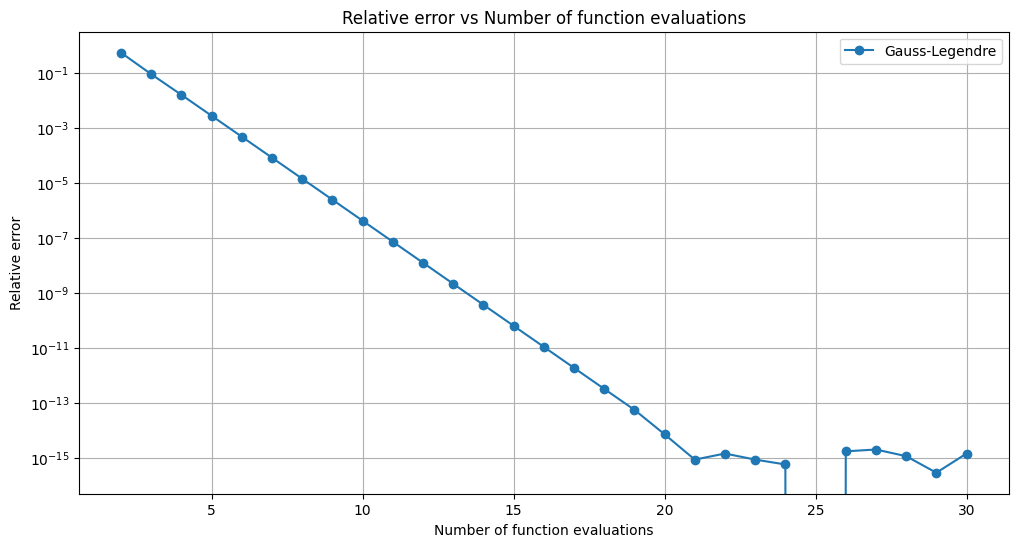

In [ ]:
def gauss_legendre_integration(n):
    x, w = roots_legendre(n)
    integral = np.sum(w * f(x))
    return integral - np.pi

def calculate_integral_error_gauss_legendre(n_values):
    errors = []
    for n in n_values:
        integral = gauss_legendre_integration(n)
        error = np.abs(np.pi - integral) / np.pi
        errors.append(error)
    return errors

n_values = np.arange(1, 30)

errors_gauss_legendre = calculate_integral_error_gauss_legendre(n_values)

plt.figure(figsize=(12, 6))
plt.plot(n_values + 1, errors_gauss_legendre, label='Gauss-Legendre', marker='o')

plt.yscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

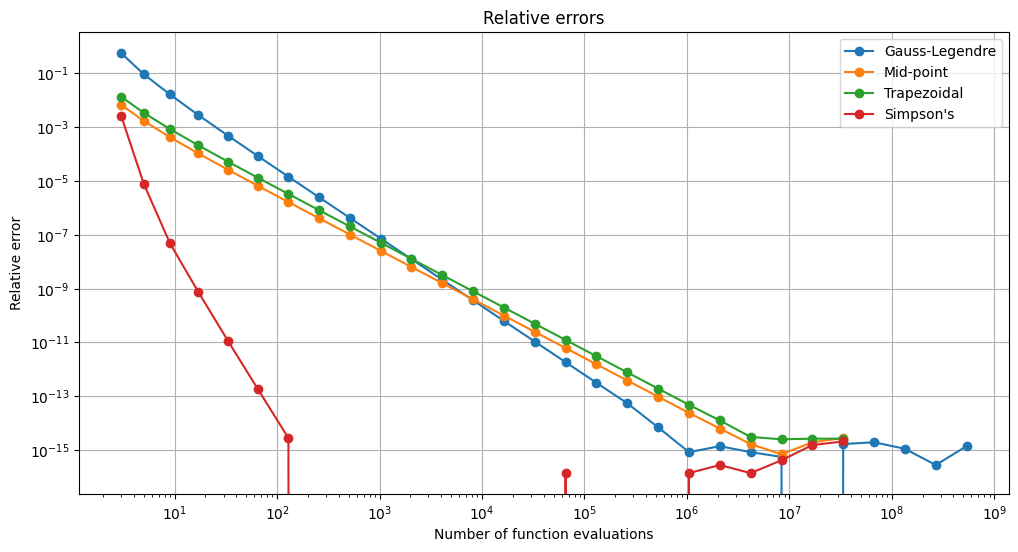

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(2**(n_values) + 1, errors_gauss_legendre, label='Gauss-Legendre', marker='o')
plt.plot(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.plot(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.plot(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative errors')
plt.legend()
plt.grid(True)
plt.show()